# Analyzing the NFL's top 100 players 
These players are picked at the begining of each season from 2021-2025

### Data Prep

In [2]:
import pandas as pd

data = pd.read_csv("../data/03_processed/21-25_NFL_100.csv")
print(data.count())
data.head()

year           500
player         500
position       500
draft_round    500
dtype: int64


,year,player,position,draft_round
2021,1,Patrick Mahomes,Quarterback,1
2021,2,Aaron Donald,Defensive tackle,1
2021,3,Aaron Rodgers,Quarterback,1
2021,4,Derrick Henry,Running back,2
2021,5,Travis Kelce,Tight end,3


In [3]:
data = data.drop_duplicates()
data

,year,player,position,draft_round
2021,1,Patrick Mahomes,Quarterback,1
2021,2,Aaron Donald,Defensive tackle,1
2021,3,Aaron Rodgers,Quarterback,1
2021,4,Derrick Henry,Running back,2
2021,5,Travis Kelce,Tight end,3
...,...,...,...,...
2025,96,Lavonte David,Linebacker,2
2025,97,Drake London,Wide receiver,1
2025,98,Aaron Jones,Running back,5
2025,99,Leonard Williams,Defensive end,1


In [4]:
data.groupby('position').count()

,year,player,draft_round
position,,,
Tight end,1,1,1
Center,6,6,6
Cornerback,43,43,43
Defensive end,45,45,45
Defensive tackle,36,36,36
Free safety,10,10,10
Fullback,2,2,2
Guard,16,16,16
Inside linebacker,4,4,4


In [5]:
data.groupby('draft_round').count()

,year,player,position
draft_round,,,
1,245,245,245
2,91,91,91
3,58,58,58
4,23,23,23
5,39,39,39
6,12,12,12
7,4,4,4
Undrafted,14,14,14


In [6]:
pos = data[['position','draft_round']].copy()
pos

,position,draft_round
2021,Quarterback,1
2021,Defensive tackle,1
2021,Quarterback,1
2021,Running back,2
2021,Tight end,3
...,...,...
2025,Linebacker,2
2025,Wide receiver,1
2025,Running back,5
2025,Defensive end,1


In [7]:
pos.groupby('position')['draft_round'].count()

position
 Tight end             1
Center                 6
Cornerback            43
Defensive end         45
Defensive tackle      36
Free safety           10
Fullback               2
Guard                 16
Inside linebacker      4
Linebacker            42
Middle linebacker      6
Offensive tackle      25
Outside linebacker    19
Quarterback           67
Running back          42
Safety                23
Strong safety          5
Tight end             18
Wide receiver         76
Name: draft_round, dtype: int64

### Data Visualization

In [8]:
counts = pd.crosstab(pos["draft_round"], pos["position"])
counts


position,Tight end,Center,Cornerback,Defensive end,Defensive tackle,Free safety,Fullback,Guard,Inside linebacker,Linebacker,Middle linebacker,Offensive tackle,Outside linebacker,Quarterback,Running back,Safety,Strong safety,Tight end,Wide receiver
draft_round,,,,,,,,,,,,,,,,,,,
1,0,1,25,30,27,2,0,7,1,17,0,17,10,51,13,5,3,1,35
2,0,1,7,1,5,2,0,7,0,10,4,2,3,5,15,9,0,3,17
3,0,0,4,7,1,2,0,0,3,7,2,4,0,2,4,5,0,6,11
4,0,0,0,6,0,0,2,0,0,1,0,1,1,6,2,1,0,0,3
5,0,1,3,1,3,1,0,2,0,5,0,0,1,0,5,2,0,5,10
6,1,3,0,0,0,3,0,0,0,0,0,0,0,2,0,0,0,3,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0
Undrafted,0,0,4,0,0,0,0,0,0,2,0,1,4,0,3,0,0,0,0


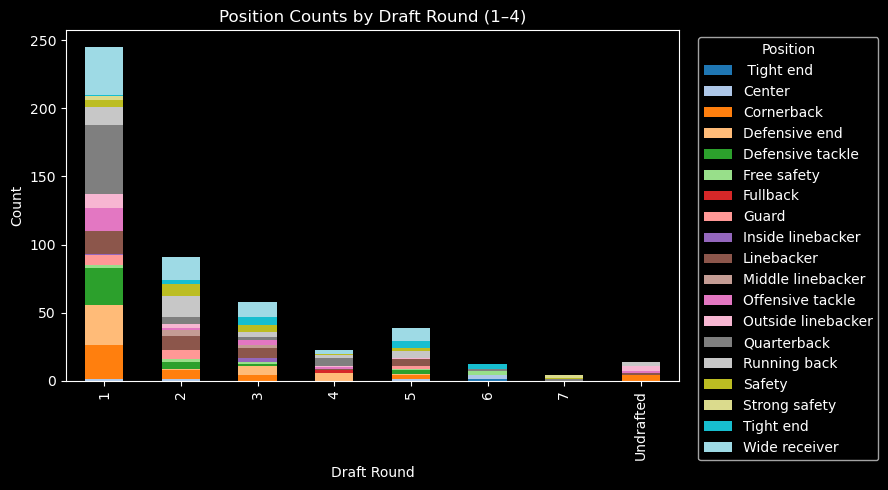

In [11]:
import matplotlib.pyplot as plt

ax = counts.plot(kind="bar", stacked=True, figsize=(9, 5), colormap="tab20")
ax.set_xlabel("Draft Round")
ax.set_ylabel("Count")
ax.set_title("Position Counts by Draft Round (1–4)")
ax.legend(title="Position", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [15]:
top_k = 7          # how many largest positions to keep (by total picks across all rounds)
sort_rounds = True
as_percent = True  # True => multiply by 100 for percent display

# --- 1) Build counts table (rounds as rows, positions as columns)
# Assumes pos has columns: 'draft_round' and 'position'
counts = pd.crosstab(pos["draft_round"], pos["position"])

try:
    counts.index = pd.to_numeric(counts.index)
except Exception:
    pass

if sort_rounds:
    counts = counts.sort_index()

# --- 2) Find the largest positions (by total picks across all rounds)
position_totals = counts.sum(axis=0)                 # total picks per position
top_positions = position_totals.nlargest(top_k).index
counts_top = counts.loc[:, top_positions]

# --- 3) Compute column-wise percentages: each column sums to 1 across rounds
# This gives the share of each round within a position's total.
pct_by_pos = counts.div(counts.sum(axis=0), axis=1)
pct_top = pct_by_pos.loc[:, top_positions]

# display as percent instead of proportion
pct_top_display = (pct_top * 100).round(1) if as_percent else pct_top

print("Top positions by total picks:")
print(position_totals.loc[top_positions].sort_values(ascending=False))

print("\nCounts (top positions):")
print(counts_top)

print("\nRound share within each top position (percent):")
print(pct_top_display)

Top positions by total picks:
position
Wide receiver       76
Quarterback         67
Defensive end       45
Cornerback          43
Linebacker          42
Running back        42
Defensive tackle    36
dtype: int64

Counts (top positions):
position     Wide receiver  Quarterback  Defensive end  Cornerback  \
draft_round                                                          
1                       35           51             30          25   
2                       17            5              1           7   
3                       11            2              7           4   
4                        3            6              6           0   
5                       10            0              1           3   
6                        0            2              0           0   
7                        0            1              0           0   
Undrafted                0            0              0           4   

position     Linebacker  Running back  Defensive tackle  
dra

In [14]:
pct_by_pos.to_csv('pct_by_pos.csv')
pct_by_pos

position,Tight end,Center,Cornerback,Defensive end,Defensive tackle,Free safety,Fullback,Guard,Inside linebacker,Linebacker,Middle linebacker,Offensive tackle,Outside linebacker,Quarterback,Running back,Safety,Strong safety,Tight end,Wide receiver
draft_round,,,,,,,,,,,,,,,,,,,
1,0.0,0.166667,0.581395,0.666667,0.750000,0.2,0.0,0.4375,0.25,0.404762,0.000000,0.68,0.526316,0.761194,0.309524,0.217391,0.6,0.055556,0.460526
2,0.0,0.166667,0.162791,0.022222,0.138889,0.2,0.0,0.4375,0.00,0.238095,0.666667,0.08,0.157895,0.074627,0.357143,0.391304,0.0,0.166667,0.223684
3,0.0,0.000000,0.093023,0.155556,0.027778,0.2,0.0,0.0000,0.75,0.166667,0.333333,0.16,0.000000,0.029851,0.095238,0.217391,0.0,0.333333,0.144737
4,0.0,0.000000,0.000000,0.133333,0.000000,0.0,1.0,0.0000,0.00,0.023810,0.000000,0.04,0.052632,0.089552,0.047619,0.043478,0.0,0.000000,0.039474
5,0.0,0.166667,0.069767,0.022222,0.083333,0.1,0.0,0.1250,0.00,0.119048,0.000000,0.00,0.052632,0.000000,0.119048,0.086957,0.0,0.277778,0.131579
6,1.0,0.500000,0.000000,0.000000,0.000000,0.3,0.0,0.0000,0.00,0.000000,0.000000,0.00,0.000000,0.029851,0.000000,0.000000,0.0,0.166667,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.00,0.000000,0.000000,0.00,0.000000,0.014925,0.000000,0.043478,0.4,0.000000,0.000000
Undrafted,0.0,0.000000,0.093023,0.000000,0.000000,0.0,0.0,0.0000,0.00,0.047619,0.000000,0.04,0.210526,0.000000,0.071429,0.000000,0.0,0.000000,0.000000


| draft_round | Quarterback | Defensive tackle | Offensive tackle | Defensive end | Strong safety | Cornerback | Outside linebacker | Wide receiver | Guard | Linebacker | Running back | Inside linebacker | Safety | Free safety | Center | Tight end | Middle linebacker | Fullback |
|-------------|-------------|------------------|------------------|---------------|---------------|------------|-------------------|---------------|-------|------------|--------------|-------------------|--------|-------------|--------|-----------|-------------------|----------|
| 1           | 0.761194029850746 | 0.75             | 0.68             | 0.666666666666666 | 0.6           | 0.581395348837209 | 0.526315789473684 | 0.460526315789473 | 0.4375 | 0.404761904761904 | 0.309523809523809 | 0.25              | 0.217391304347826 | 0.2         | 0.166666666666666 | 0.0555555555555555 | 0                 | 0        |
| 2           | 0.0746268656716417 | 0.138888888888888 | 0.08             | 0.0222222222222222 | 0             | 0.162790697674418 | 0.157894736842105 | 0.223684210526315 | 0.4375 | 0.238095238095238 | 0.357142857142857 | 0                 | 0.391304347826087 | 0.2         | 0.166666666666666 | 0.166666666666666 | 0.666666666666666 | 0        |
| 3           | 0.0298507462686567 | 0.0277777777777777 | 0.16             | 0.155555555555555 | 0             | 0.0930232558139534 | 0                 | 0.144736842105263 | 0      | 0.166666666666666 | 0.0952380952380952 | 0.75              | 0.217391304347826 | 0.2         | 0                 | 0.333333333333333 | 0.333333333333333 | 0        |
| 4           | 0.0895522388059701 | 0                | 0.04             | 0.133333333333333 | 0             | 0          | 0.0526315789473684 | 0.0394736842105263 | 0      | 0.0238095238095238 | 0.0476190476190476 | 0                 | 0.0434782608695652 | 0           | 0                 | 0                 | 0                 | 1        |
| 5           | 0           | 0.0833333333333333 | 0                | 0.0222222222222222 | 0             | 0.0697674418604651 | 0.0526315789473684 | 0.131578947368421 | 0.125  | 0.119047619047619 | 0.119047619047619 | 0                 | 0.0869565217391304 | 0.1         | 0.166666666666666 | 0.277777777777777 | 0                 | 0        |
| 6           | 0.0298507462686567 | 0                | 0                | 0                 | 0             | 0          | 0                  | 0                 | 0      | 0                  | 0                  | 0                 | 0                  | 0.3         | 0.5               | 0.166666666666666 | 0                 | 0        |
| 7           | 0.0149253731343283 | 0                | 0                | 0                 | 0.4           | 0          | 0                  | 0                 | 0      | 0                  | 0                  | 0                 | 0.0434782608695652 | 0           | 0                 | 0                 | 0                 | 0        |
| Undrafted   | 0           | 0                | 0.04             | 0                 | 0             | 0.0930232558139534 | 0.210526315789473 | 0                 | 0      | 0.0476190476190476 | 0.0714285714285714 | 0                 | 0                  | 0           | 0                 | 0                 | 0                 | 0        

![Alt text](./images/NFL_100_pct.png)

- Green == Highest Pct
- Orange == Second Best Pct
- Yellow == Third Best Pct
- Red == Fourth Best Pct

All analysis is exclusively based on the data presented for the years 2021-2025.

This data unequivocally demonstrates the substantial number of first-round picks being selected in the NFL top 100 over the past five years. However, it also reveals a few positions where team scouts may have overlooked their evaluations of later-round talent.

For instance, Middle Linebacker has zero NFL 100 players drafted in the first round, while 66% and 33% were selected in the second and third rounds, respectively. Similarly, Guard has the same 44% selection rate for the first and second rounds, while Running Back and Safety have a higher percentage in the second round compared to the first.

The primary takeaway from this analysis is not necessarily that team scouts have flawed scouting or evaluation of these players. Instead, it suggests that these players may have possessed greater upside and ceiling compared to players selected in the first or second rounds. Depending on the draft strategy and the specific player being drafted, a team could strategically utilize these undervalued later-round players to maximize the value of their selections. This chart serves as a partial representation of the comprehensive picture that can elucidate the true value of certain players. For instance, 76% of quarterbacks in the NFL 100 over the past five years were first-round picks. This statistic does not imply that selecting a quarterback in the first round guarantees a 76% probability of being a top 100 pick. Rather, it simply indicates that quarterbacks are highly regarded by NFL teams, leading them to select them in the first round appropriately. However, there is a slight increase at 9% of quarterbacks (6 quarterbacks) selected in the fourth round, suggesting a significant value in quarterbacks later in the draft. Selecting a quarterback like Dak Prescott, who was chosen in the fourth round, is a significant achievement because allocating a third or fourth-round pick is more manageable for a team that is too accomplished to secure a top-five draft pick and aims to secure a future starter. This strategy can be employed to select other team’s fourth-round quarterback prospects in the early fourth round or the conclusion of the third round.

This analysis highlights the importance of prioritizing certain positions over others to optimize value-added players compared to needs-based considerations. For instance, if a team requires a running back (RB1) and a wide receiver (WR2), this data suggests that teams tend to accurately project the value of round 1 wide receivers more than round 1 running backs and undervalue round 2 running backs. In this specific scenario, allocate the first round of the draft to the WR2 and the second round to the RB1. This strategy could yield more valuable performance than selecting a running back in the first round and a wide receiver in the second round.

The data also indicates the necessity of drafting the trenches in the first round, even if it is not the flashy player that fans are always clamoring for. Defensive Tackles are selected 75% of the time, Offensive Tackles are selected 68% of the time, and Defensive Ends are selected 67% of the time. First-Round draft picks in the NFL 100 are an incredibly high number, so even when there is a desire to add weapons, this data shows the chances of finding that franchise player on the trenches are very low, unlike the Guard, which has 44% in both the first and second rounds.